In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
# read the data
data = pd.read_csv('./Real estate.csv')

In [4]:
# get a feeling about the data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# types of features
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [6]:
# size
data.shape

(414, 8)

In [ ]:
1,3
1,5
1,3
1,6
1,80

In [ ]:
2,1,4
5,1,4
7,1,4
8,1,4
5,1,4

(array([0., 0., 0., 0., 0., 6., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

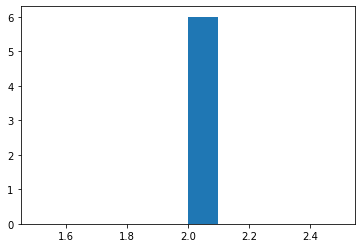

In [10]:
# the feature has only one value. All values are similar
test = np.array([2,2,2,2,2,2])
plt.hist(test)

(array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

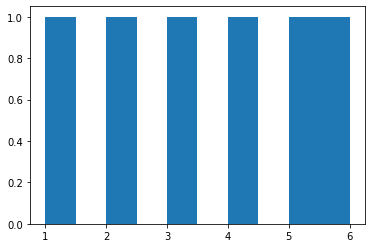

In [12]:
# we have distinct values for that feature
test = np.array([1,2,3,4,5,6])
plt.hist(test, bins=10)

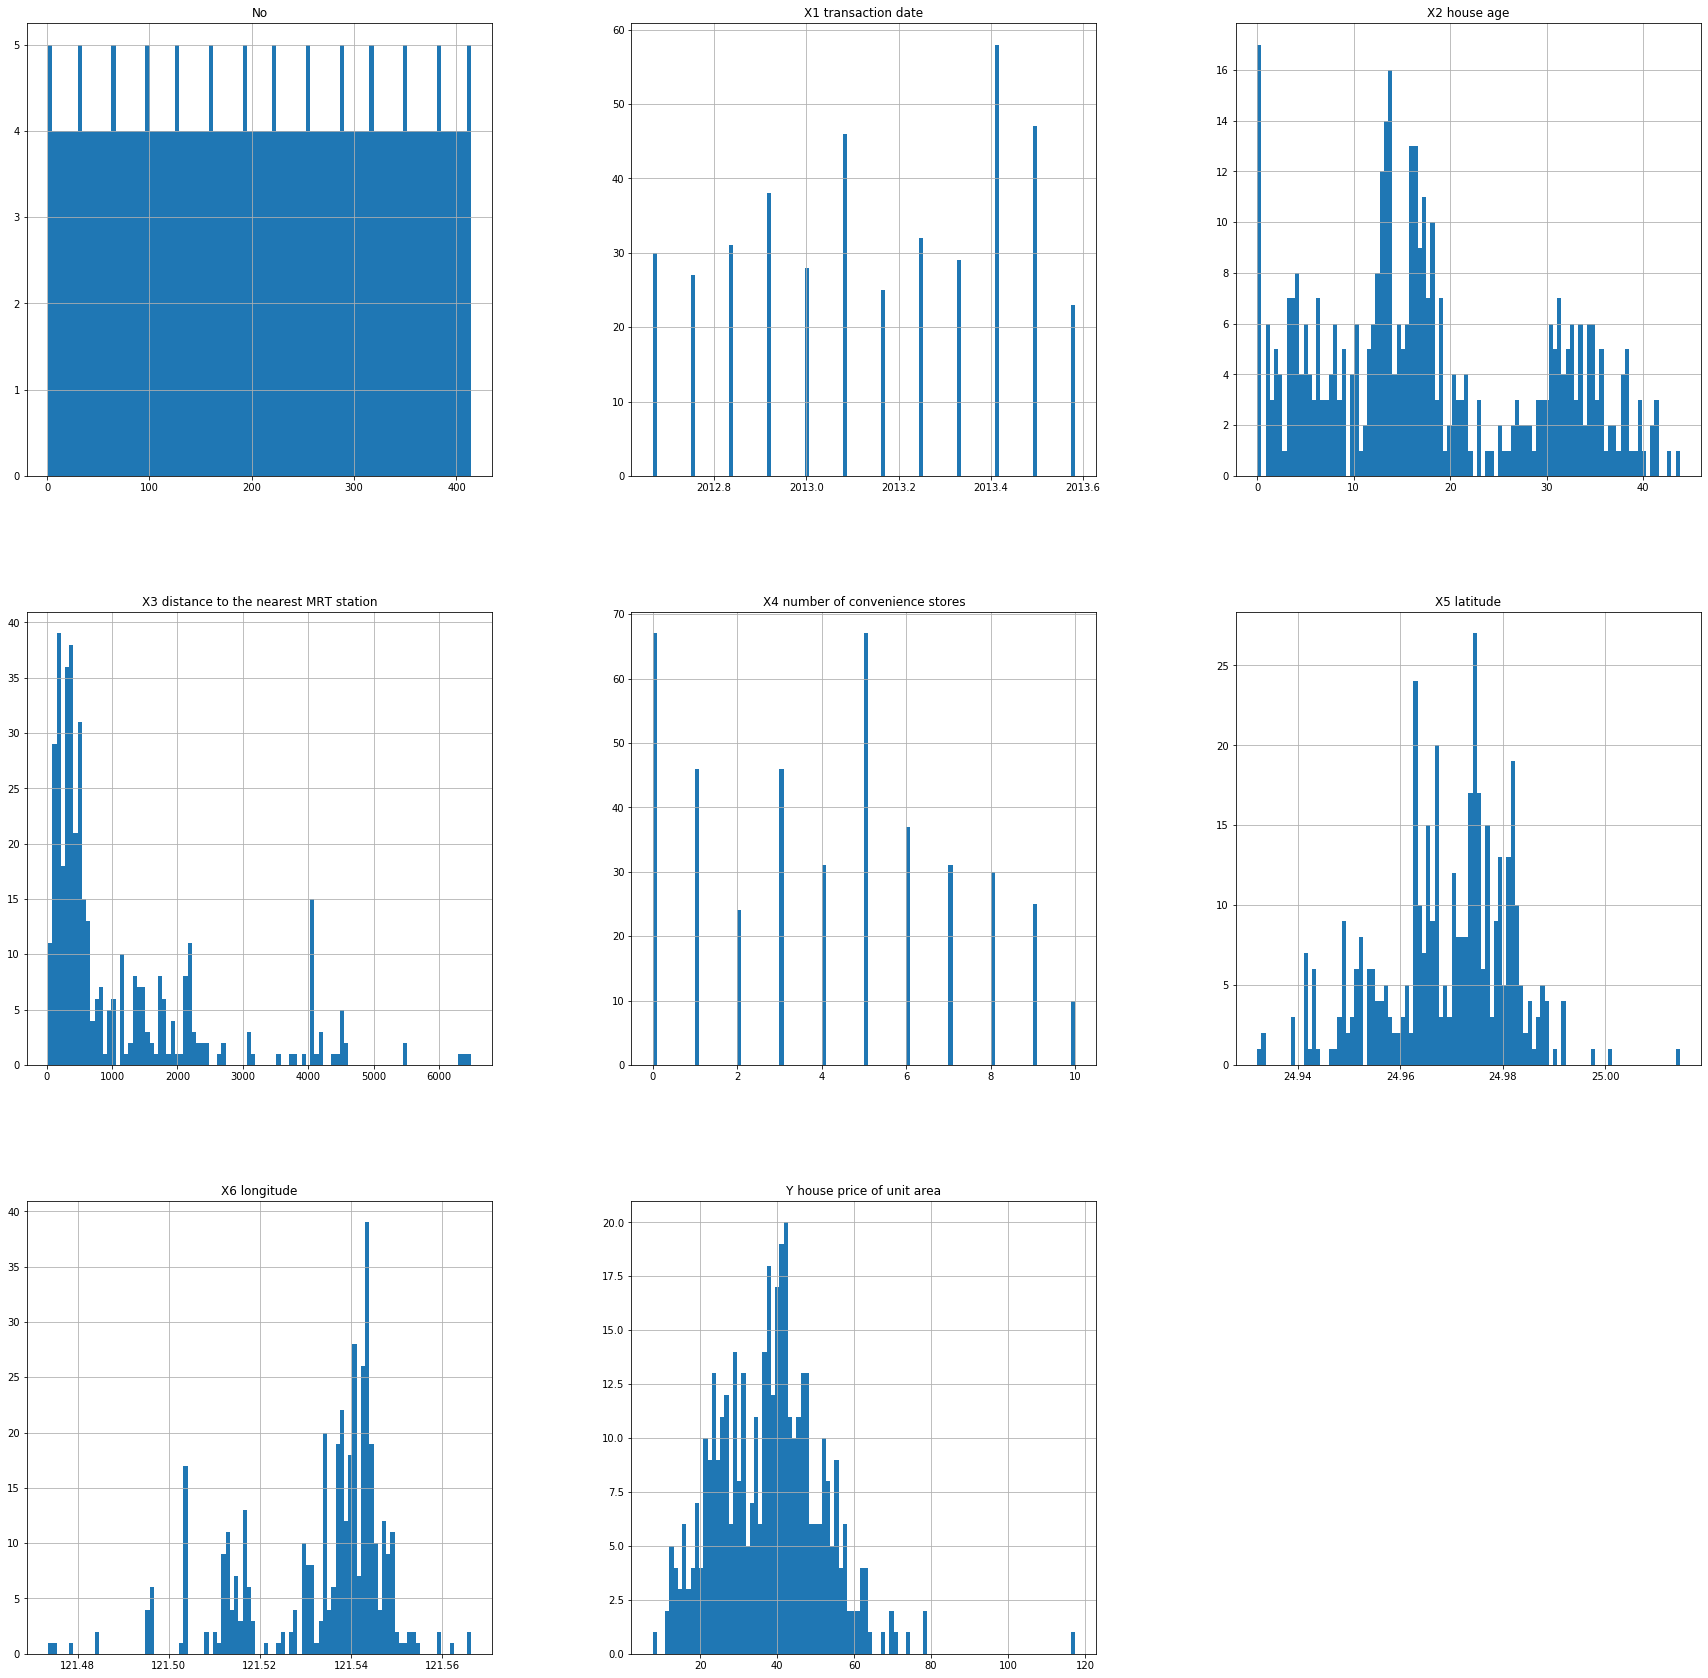

In [7]:
data.hist(bins=100, figsize=(30,30))
plt.show()

### we look at column `No` and looks an id for each row. Generally if the features follow a uniform distribution then we delete that column. Double Check ...

### one can use https://en.m.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

In [13]:
# find min/max
data['No'].agg({'min':min, 'max':max})

min      1
max    414
Name: No, dtype: int64

In [15]:
# the null hypothesis, the two distributions are identical
# A small p-value (typically ≤ 0.05) you reject the null hypothesis.
# return (KS test statistic, p-value)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html
stats.kstest(data['No'],
             stats.uniform(loc=1, scale=414.0).cdf)

KstestResult(statistic=0.0024154589371980784, pvalue=1.0)

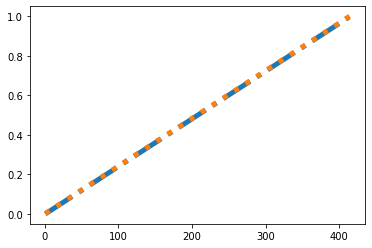

In [16]:
# Just a visual
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

x = list(range(1,414))
plt.plot(x, stats.uniform(loc=1, scale=414.0).cdf(x), linestyle='-.', linewidth=5)
plt.plot(*ecdf(data['No'].values), linestyle=':', linewidth=5)
plt.show()


In [17]:
# so we can safely remove that column
data.drop(columns='No', inplace=True)

In [18]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [19]:
data.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### start training a multiple linear model

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#  define the model object
lm = LinearRegression()
# fit the data, i.e. search for the paramters
X_train = data.drop(columns='Y house price of unit area')
y_train = data['Y house price of unit area']
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# get the coefficients of the model
["{:.5f}".format(x) for x in lm.coef_]

['5.14623', '-0.26970', '-0.00449', '1.13328', '225.47298', '-12.42360']

In [24]:
# ge the intercept value
lm.intercept_

-14437.100802278139

## Save the model object into files

In [25]:
import pickle

In [27]:
pickle.dump(lm, open('./model.sav', 'wb'))

## If you want to load the model from the storage

In [29]:
loaded_model = pickle.load(open('./model.sav', 'rb'))

## Use the model to predict

In [40]:
# note the the predict function assumes a 2D array where each line is a sample to predict for
x = np.array([2017.917,10,306.59470,15,24.98034,121.53951]).reshape(1,6)
result = loaded_model.predict(x)

if x.shape[0] == 1:
    result = result[0]

print(result)

82.91863978114088


In [36]:
np.array([2017.917,10,306.59470,15,24.98034,121.53951]).shape

(6,)

In [35]:
np.array([2017.917,10,306.59470,15,24.98034,121.53951]).reshape(1,6).shape

(1, 6)